<a href="https://colab.research.google.com/github/mg-789/COGNITIVE-STATE-ESTIMATION-FOR-ONLINE-MEETINGS-USING-MACHINE-LEARNING/blob/main/WIth_Kaggle_images_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
from pprint import pprint
from google.colab import drive

In [ ]:
path="/content/drive/My Drive/Colab Notebooks/dataset_Final"
startpath =path
all_paths = [os.path.join(path, name) for path, subdirs, files in os.walk(startpath) for name in files]
pprint(all_paths)

[]


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/dataset_Final"
startpath =path
all_paths = [os.path.join(path, name) for path, subdirs, files in os.walk(startpath) for name in files]
pprint(all_paths)



count_angry=0
count_fear=0
count_happy=0
count_neutral=0
count_sad=0
count_suprise=0

number_train=5555555
classfile = []
for pathfile in all_paths:
    # comment out this section if you don't want to train "Angry"
    result = pathfile.find('Angry')
    if result != -1:
        if count_angry<number_train: 
             classfile.append(["Angry", pathfile])
             count_angry+=1 
   

    # comment out this section if you don't want to train "Fear"
    result = pathfile.find('Fear')
    if result != -1:
        if count_fear<number_train: 
            classfile.append(["Fear", pathfile])
            count_fear+=1

    # comment out this section if you don't want to train "Happy"
    result = pathfile.find('Happy')
    if result != -1:
        if count_happy <= number_train: 
            classfile.append(["Happy", pathfile])
            count_happy+=1
        
    # comment out this section if you don't want to train "Neutral"
    result = pathfile.find('Neutral')
    if result != -1:
        
        if count_neutral<number_train: 
          classfile.append(["Neutral", pathfile])
          count_neutral+=1

    # comment out this section if you don't want to train "Sad"
    result = pathfile.find('Sad')
    if result != -1:
        if count_sad<number_train: 
           classfile.append(["Sad", pathfile])
           count_sad+=1 

    # comment out this section if you don't want to train "Surprise"
    result = pathfile.find('Suprise')
    if result != -1:
        if count_suprise<number_train: 
            classfile.append(["Suprise", pathfile])
            count_suprise+=1

count=count_angry+count_fear+count_happy+count_neutral+count_sad+count_suprise
print(count_angry) 
print(count_fear) 
print(count_happy) 
print(count_neutral) 
print(count_sad) 
print(count_suprise) 
print(count)
print(len(all_paths))

In [ ]:
path="/content/drive/My Drive/Colab Notebooks/dataset_Final"
startpath =path
all_paths = [os.path.join(path, name) for path, subdirs, files in os.walk(startpath) for name in files]
pprint(all_paths)



count_angry=0
count_fear=0
count_happy=0
count_neutral=0
count_sad=0
count_suprise=0

number_train=5555555
classfile = []
for pathfile in all_paths:
    # comment out this section if you don't want to train "Angry"
    result = pathfile.find('Angry')
    if result != -1:
        if count_angry<number_train: 
             classfile.append(["Angry", pathfile])
             count_angry+=1 
   

    # comment out this section if you don't want to train "Fear"
    result = pathfile.find('Fear')
    if result != -1:
        if count_fear<number_train: 
            classfile.append(["Fear", pathfile])
            count_fear+=1

    # comment out this section if you don't want to train "Happy"
    result = pathfile.find('Happy')
    if result != -1:
        if count_happy <= 3000: 
            classfile.append(["Happy", pathfile])
            count_happy+=1
        
    # comment out this section if you don't want to train "Neutral"
    result = pathfile.find('Neutral')
    if result != -1:
        
        if count_neutral<number_train: 
          classfile.append(["Neutral", pathfile])
          count_neutral+=1

    # comment out this section if you don't want to train "Sad"
    result = pathfile.find('Sad')
    if result != -1:
        if count_sad<number_train: 
           classfile.append(["Sad", pathfile])
           count_sad+=1 

    # comment out this section if you don't want to train "Surprise"
    result = pathfile.find('Suprise')
    if result != -1:
        if count_suprise<number_train: 
            classfile.append(["Suprise", pathfile])
            count_suprise+=1

count=count_angry+count_fear+count_happy+count_neutral+count_sad+count_suprise
print(count_angry) 
print(count_fear) 
print(count_happy) 
print(count_neutral) 
print(count_sad) 
print(count_suprise) 
print(count)
print(len(all_paths))


random.shuffle(classfile)  # this line shuffles the results array

row = 48
cox = 48 
def process(image_name):
    output = None
    #check the format of image
    if image_name.endswith('jpg') or image_name.endswith('png') or image_name.endswith('jpeg'):
        # read the image in grayscale
        gray_scale_image = cv2.imread(image_name,cv2.IMREAD_GRAYSCALE) 
        gray_scale_image = gray_scale_image/255.0
        # resize the image 28 * 28
        output = cv2.resize(gray_scale_image, (row,cox))     
    #return the result
    return output

# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5,6] 
 
# heights of bars 
height_count = [count_angry, count_fear, count_happy, count_neutral, count_sad,count_suprise] 
  
# labels for bars 
emotion_label = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'] 
  
# plotting a bar chart 
plt.bar(left, height_count, tick_label = emotion_label, 
        width = 0.6, color = ['green', 'red','cyan','magenta','yellow','blue']) 
  
# naming the x-axis 
plt.xlabel('Emotion') 
# naming the y-axis 
plt.ylabel('Count') 
  
# function to show the plot 
plt.show()


training_dataset = []
testing_dataset = []
testing_label = []
training_label = []

#Split the data set, so that we have 80% of it be inside the training data set,
#and the 20% be contained inside the testing data set

counter_img=1
train_par=0.8 #Standred 80%/20%
for image in classfile:
  img=process(image[1])
  if counter_img<=train_par*len(classfile): 
       training_dataset.append(np.array(img))
       training_label.append(np.array(image[0]))
  else:     
       testing_dataset.append(np.array(img))
       testing_label.append(np.array(image[0]))
   
  counter_img+=1


  
empty_arr=[i for i,x in enumerate(training_dataset) if x ==[]]

feature_train = [i for i in training_dataset if i != []]
feature_train = np.array(feature_train).reshape(-1, row, cox, 1)
feature_train =np.where(np.isnan(feature_train), 0, feature_train)

labels_train = [i for i in training_label]
labels_train = np.array(labels_train).astype(str)
#Splitting the feature and label for test dataset 

feature_test = [i for i in testing_dataset if i != []]
feature_test = np.array(feature_test).reshape(-1, row, cox, 1)
feature_test =np.where(np.isnan(feature_test), 0, feature_test)

labels_test = [i for i in testing_label] 
labels_test = np.array(labels_train).astype(str)

KeyboardInterrupt: ignored

In [ ]:
random.shuffle(classfile)  # this line shuffles the results array

In [ ]:

row = 48
cox = 48 
def process(image_name):
    output = None
    #check the format of image
    if image_name.endswith('jpg') or image_name.endswith('png') or image_name.endswith('jpeg'):
        # read the image in grayscale
        gray_scale_image = cv2.imread(image_name,cv2.IMREAD_GRAYSCALE) 
        gray_scale_image = gray_scale_image/255.0
        # resize the image 28 * 28
        output = cv2.resize(gray_scale_image, (row,cox))     
    #return the result
    return output

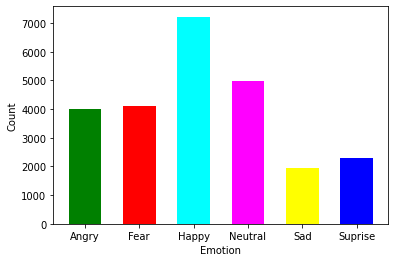

In [ ]:


# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5,6] 
 
# heights of bars 
height_count = [count_angry, count_fear, count_happy, count_neutral, count_sad,count_suprise] 
  
# labels for bars 
emotion_label = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise'] 
  
# plotting a bar chart 
plt.bar(left, height_count, tick_label = emotion_label, 
        width = 0.6, color = ['green', 'red','cyan','magenta','yellow','blue']) 
  
# naming the x-axis 
plt.xlabel('Emotion') 
# naming the y-axis 
plt.ylabel('Count') 
  
# function to show the plot 
plt.show()

In [ ]:
#Nazera Code
training_dataset = []
testing_dataset = []
testing_label = []
training_label = []

#Split the data set, so that we have 80% of it be inside the training data set,
#and the 20% be contained inside the testing data set

counter_img=1
train_par=0.8 #Standred 80%/20%
for image in classfile:
  img=process(image[1])
  if counter_img<=train_par*len(classfile): 
       training_dataset.append(np.array(img))
       training_label.append(np.array(image[0]))
  else:     
       testing_dataset.append(np.array(img))
       testing_label.append(np.array(image[0]))
   
  counter_img+=1
training_dataset
training_label

In [ ]:
empty_arr=[i for i,x in enumerate(training_dataset) if x ==[]]

feature_train = [i for i in training_dataset if i != []]
feature_train = np.array(feature_train).reshape(-1, row, cox, 1)
feature_train =np.where(np.isnan(feature_train), 0, feature_train)

labels_train = [i for i in training_label]
labels_train = np.array(labels_train).astype(str)
#Splitting the feature and label for test dataset 

feature_test = [i for i in testing_dataset if i != []]
feature_test = np.array(feature_test).reshape(-1, row, cox, 1)
feature_test =np.where(np.isnan(feature_test), 0, feature_test)

labels_test = [i for i in testing_label] 
labels_test = np.array(labels_train).astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder() 

labels_train= number.fit_transform(labels_train)
labels_test= number.fit_transform(labels_test)
labels_train
labels_test

array([4, 3, 3, ..., 3, 1, 1])

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score 
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta 
from keras import regularizers

y_train = keras.utils.to_categorical(labels_train)
y_test = keras.utils.to_categorical(labels_test)
print(y_train)

filters = 10
n_classes = y_train.shape[1]
'''
#Explanation of the sequential model by this link: https://keras.io/guides/sequential_model/
#1st convolution layer
model = Sequential()
model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(row, cox, 1)))
model.add(Conv2D(filters,kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(filters, (3, 3), activation='relu'))
model.add(Conv2D(filters, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


"\n#Explanation of the sequential model by this link: https://keras.io/guides/sequential_model/\n#1st convolution layer\nmodel = Sequential()\nmodel.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(row, cox, 1)))\nmodel.add(Conv2D(filters,kernel_size= (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))\n\n#2nd convolution layer\nmodel.add(Conv2D(filters, (3, 3), activation='relu'))\nmodel.add(Conv2D(filters, (3, 3), activation='relu'))\n\nmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))\n\n#3rd convolution layer\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\n\nmodel.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))\nmodel.add(BatchNormalization())\nmodel.add(Flatten())\n\n#fully connected neural networks\nmodel.add(Dense(1024, activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1024, activation='relu')) \nmodel.add(Dropout(0.2))\nmodel.add(Dense(2, activat

In [ ]:
import keras
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score 
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta 
from keras import regularizers

y_train = keras.utils.to_categorical(labels_train)
y_test = keras.utils.to_categorical(labels_test)
print(y_train)

filters = 10
n_classes = y_train.shape[1]

#Explanation of the sequential model by this link: https://keras.io/guides/sequential_model/
#1st convolution layer
model = Sequential()
model.add(Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=(row, cox, 1)))
model.add(Conv2D(filters,kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(filters, (3, 3), activation='relu'))
model.add(Conv2D(filters, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

def larger_model(optim): 
  model = Sequential()
  model.add(get_conv2D(64, (5, 5)))
  model.add(BatchNormalization())
  model.add(get_conv2D(64, (5, 5)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(get_conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(get_conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(get_conv2D(256, (3, 3)))
  model.add(BatchNormalization())
  model.add(get_conv2D(256, (3, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())    
  model.add(Dense(128, activation='elu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(6, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

  return model
# build the model
optims = [optimizers.Adam(0.001)]
model = larger_model(optims[0])


early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
optims = [optimizers.Adam(0.001)]
model = larger_model(optims[0])
'''
history = model.fit_generator(
    train_datagen.flow(feature_train, y_train, batch_size=32),
    validation_data= 0.2,
    steps_per_epoch=len(feature_train) / 32,
    epochs=100,
    use_multiprocessing=True
)
'''
history = model.fit(train_datagen.flow(feature_train, y_train), validation_data=(feature_test, labels_test), shuffle=True, epochs=100, batch_size= 32,callbacks=callbacks)


In [ ]:
# Fit the model

#history = model.fit(feature_train, y_train, validation_split=0.2,, shuffle=True, epochs=100, batch_size=len(feature_train))
history = model.fit(feature_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size= 32)


In [ ]:
#Internet but Modfiy.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

def get_conv2D(filters, kernel_size):
    return Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          input_shape=(48, 48, 1),
          activation='elu',
          padding='same',
          kernel_initializer='he_normal'
    )


def larger_model(optim): 
  model = Sequential()
  model.add(get_conv2D(64, (5, 5)))
  model.add(BatchNormalization())
  model.add(get_conv2D(64, (5, 5)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(get_conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(get_conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(get_conv2D(256, (3, 3)))
  model.add(BatchNormalization())
  model.add(get_conv2D(256, (3, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())    
  model.add(Dense(128, activation='elu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(6, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model
# build the model

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
optims = [optimizers.Adam(0.0001)]
model = larger_model(optims[0])

history = model.fit_generator(
    train_datagen.flow(feature_train, y_train, batch_size=32),
    validation_data= (feature_test,y_test),
    steps_per_epoch=len(feature_train) / 32,
    epochs=100,
    use_multiprocessing=True
)

feature_test =np.where(np.isnan(feature_test), 0, feature_test)

labels_tes

In [ ]:
# Fit the model
history = model.fit(feature_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=len(feature_train))
#history = model.fit(feature_train, y_train, validation_split=0.2, shuffle=True, epochs=32, batch_size= 100)



In [ ]:
#Internet but Modfiy.
import seaborn as sns
import matplotlib.pyplot as pyplot

sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

In [ ]:
import tensorflow as tf 

import math
import numpy as np
import pandas as pd

#import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

In [ ]:
#print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
#Standred
import numpy as np 
def category_output(prediction):
    if np.argmax(prediction) == 0:
        cate_predict = {"status": "success", "category": "happy", "category id": str(np.argmax(prediction)), "prediction rate": str(np.max(prediction)*100)}
    elif np.argmax(prediction) == 1:
        cate_predict = {"status": "success", "category": "sad", "category id": str(np.argmax(prediction)), "prediction rate": str(np.max(prediction)*100)}
    elif np.argmax(prediction) == 2:
        cate_predict = {"status": "success", "category": "fear", "category id": str(np.argmax(prediction)), "prediction rate": str(np.max(prediction)*100)}
    elif np.argmax(prediction) == 3:
        cate_predict = {"status": "success", "category": "surprise", "category id": str(np.argmax(prediction)), "prediction rate": str(np.max(prediction)*100)}
    elif np.argmax(prediction) == 4:
        cate_predict = {"status": "success", "category": "angry", "category id": str(np.argmax(prediction)), "prediction rate": str(np.max(prediction)*100)}
    elif np.argmax(prediction) == 5:
        cate_predict = {"status": "success", "category": "neutral", "category id": str(np.argmax(prediction)), "prediction rate": str(np.max(prediction)*100)}
    return cate_predict

In [ ]:
#To simple presntions of the other cell
for i in range(len(testing_dataset)): 
    test_data = np.array(testing_dataset[i]).reshape(-1, row, cox, 1)
    model_output = model.predict(test_data)
    output_class = category_output(model_output)
    print('Image: ',i,'model_output: ', output_class)

Image:  0 model_output:  {'status': 'success', 'category': 'surprise', 'category id': '3', 'prediction rate': '99.99977350234985'}
Image:  1 model_output:  {'status': 'success', 'category': 'sad', 'category id': '1', 'prediction rate': '99.99991655349731'}
Image:  2 model_output:  {'status': 'success', 'category': 'surprise', 'category id': '3', 'prediction rate': '99.87205266952515'}
Image:  3 model_output:  {'status': 'success', 'category': 'angry', 'category id': '4', 'prediction rate': '59.80626940727234'}
Image:  4 model_output:  {'status': 'success', 'category': 'fear', 'category id': '2', 'prediction rate': '99.95255470275879'}
Image:  5 model_output:  {'status': 'success', 'category': 'angry', 'category id': '4', 'prediction rate': '99.99812841415405'}
Image:  6 model_output:  {'status': 'success', 'category': 'happy', 'category id': '0', 'prediction rate': '99.72809553146362'}
Image:  7 model_output:  {'status': 'success', 'category': 'happy', 'category id': '0', 'prediction r

In [ ]:
model.save('ImageEmptionClassifierModel')

INFO:tensorflow:Assets written to: ImageEmptionClassifierModel/assets


In [ ]:
fer_json = model.to_json()
with open("emotion.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("emotion.h5")